In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [98]:
#after importing libraries we load our dataset

In [99]:
data1=pd.read_csv("D:/Top Mentor/ml/16th July/Github/Housing.csv")

In [100]:
data1.head()           #head shows first 5 rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [101]:
data1.shape

(545, 12)

In [102]:
#It has 545 rows and 12 columns

# Variable Identification

1. First, identify Predictor (Input) and Target (output) variables

In [103]:
# We have to predict the purchase price of house so our target(Output) variable will be "Price" 
# and remaiming columns will be Predictors(Input variables)

2 Identify the data type of the variables.

In [104]:
#here we check the information of data with the help of info function
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [105]:
datatype = data1.dtypes

num_col = datatype[(datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()

Categorical_Columns=print("Categorical_Columns :",cat_col)
Numerical_Columns=print("Numerical_Columns :",num_col)

Categorical_Columns : ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
Numerical_Columns : ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [106]:
#now we check is there any null values
data1.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [107]:
#there is no null values

# Univariate Analysis

---We explore variables one by one.

---Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

Continuous Variable Analysis

--Measure of central tendency(Mean, Median, Mode) of the variable.

--Measure of spread(Range,IQR, Variance,Standard Deviation) of the variable.

--Measure of Shape(Symmetrical Distribution e.g. Normal Distribution,Asymmetrical Distribution (Left or Right Skewed Distribution),Kurtosis(shape of the of the distribution in terms of height or flatness)

Categorical Variable Analysis

--For categorical variables, we will use frequency distribution of each category.e.g Bar Chart, Pie Chart

In [108]:
data1.describe() 

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [109]:
#describe function shows that, total count of data, mean , standard deviation, minimum & maximum value of each column present in the data
#and 25% means 25th percentile that means 25% value is less than 3600 in area column meanwhile same goes with 50% and 75%

In [110]:
data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


---First we visualize categorical column using count plot

In [111]:
cat_col1=data1.drop(['price','area','bedrooms','stories','parking','bathrooms'],axis=1)
cat_col1

,mainroad,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
0,yes,no,no,no,yes,furnished
1,yes,no,no,no,yes,furnished
2,yes,no,yes,no,no,semi-furnished
3,yes,no,yes,no,yes,furnished
4,yes,yes,yes,no,yes,furnished
...,...,...,...,...,...,...
540,yes,no,yes,no,no,unfurnished
541,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,unfurnished
543,no,no,no,no,no,furnished


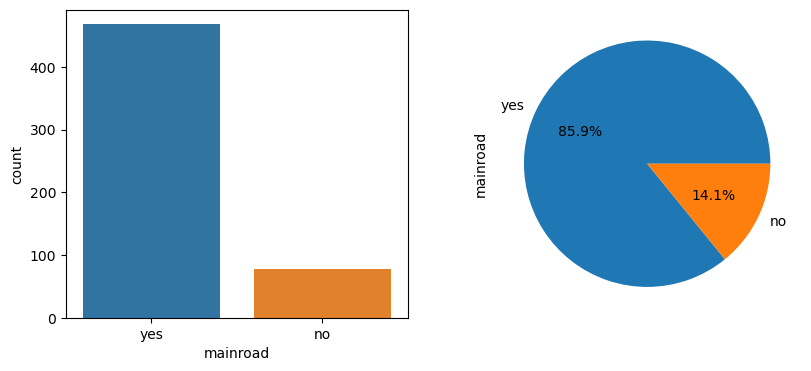

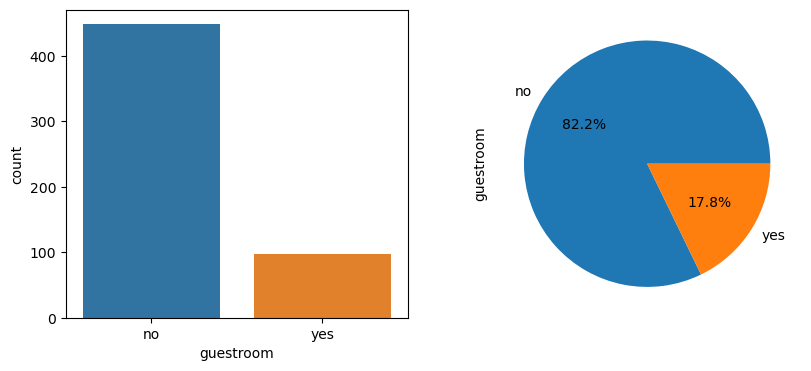

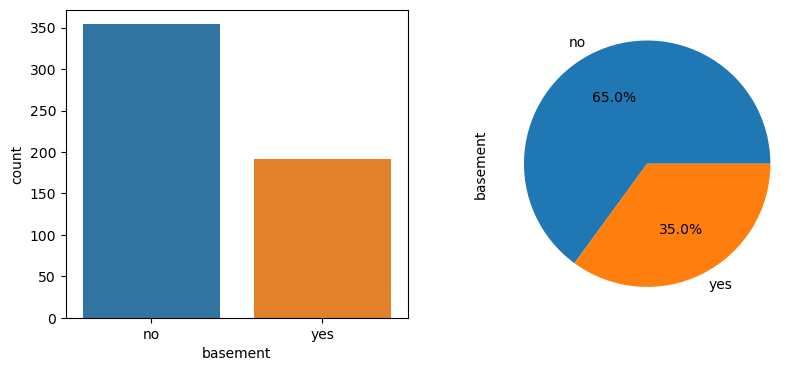

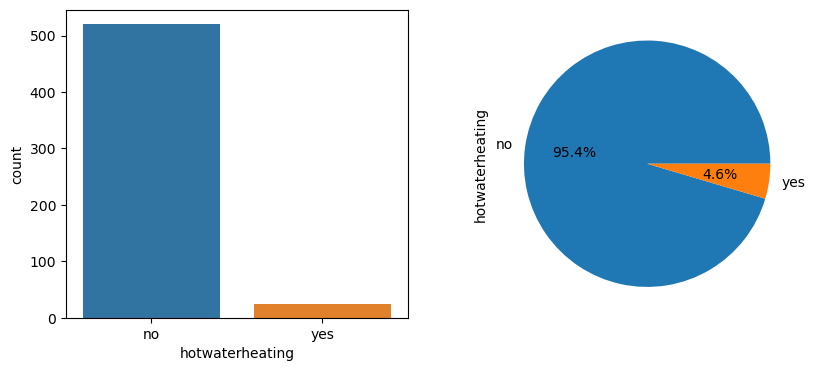

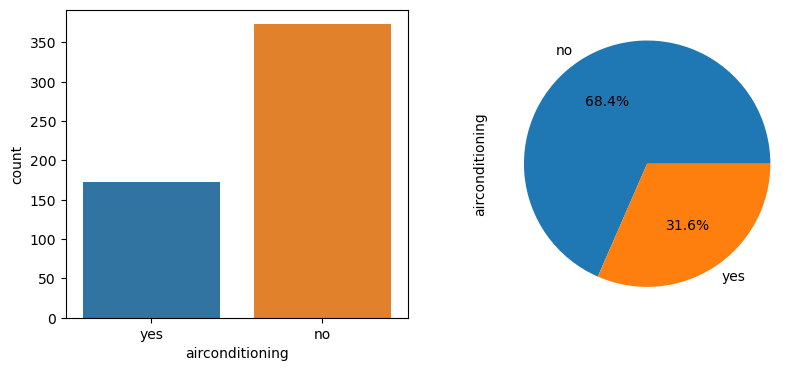

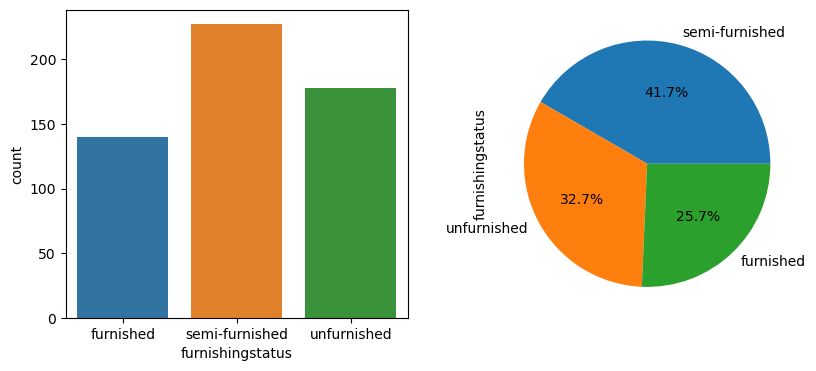

In [112]:
for col in cat_col1:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    
    sns.countplot(x=cat_col1[col])
    plt.subplot(132)
   
    cat_col1[col].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.show()
    

-----From the count plot, we can have below observations


1. 85.9% of buyers want the house in Mainroad
2. The demand for guest rooms is less bcz 82.2% of buyers don't want guestrooms.
3. 65% of buyers purchased a house who have a basement. This shows most buyers prefer to have a basement
4. The buyer who doesn't have hot watering is more than the one who has. As per graph, 95.4% of buyers do not want hot watering.
5. 68.4% of buyers don't have airconditioning.
6. As per the graph 41.7% of buyers buys semi furnished house followed by unfurnished house whose percentage is 32.7%.

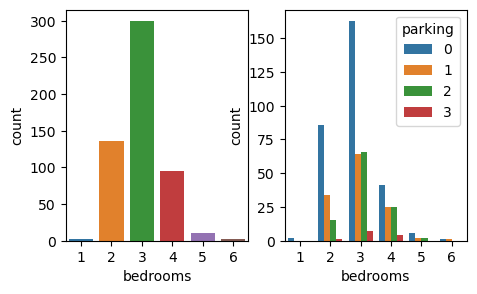

In [113]:
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
sns.countplot(x='bedrooms',data=data1)

plt.subplot(1,3,2)
sns.countplot(x='bedrooms',hue='parking',data=data1)
plt.show()

According to 1st graph, we see that almost 290 people purchased 3 bedrooms house

According to 2nd graph, we see that people purchased 3bedrooms more with 0 parking, after that 2bedrooms more with 0 parking

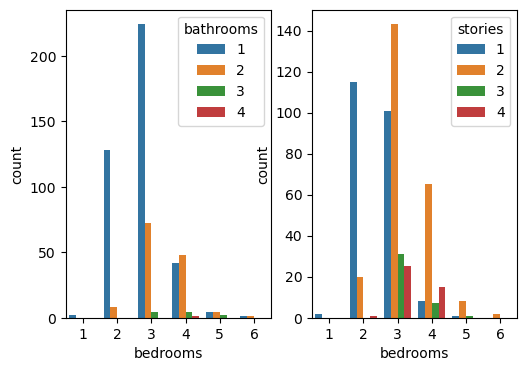

In [114]:
plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
sns.countplot(x='bedrooms',hue='bathrooms',data=data1)

plt.subplot(1,3,2)
sns.countplot(x='bedrooms',hue='stories',data=data1)
plt.show()

here we see that  3 bedrroms with 1 bathrooms sold more 

According to 2nd graph 3bedroom with 2 stories house sold more and after that 2bedrooms house with 1 stories

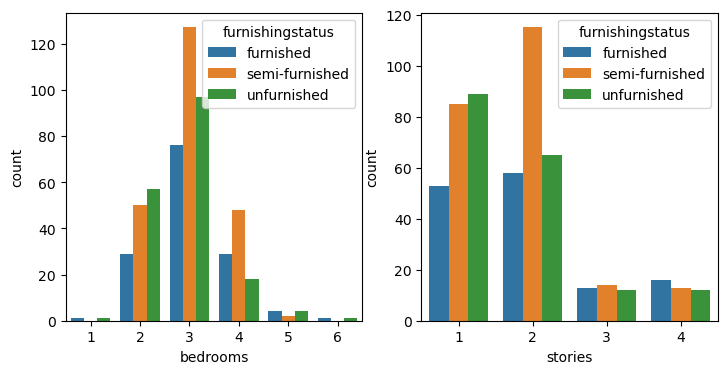

In [115]:
plt.figure(figsize=(13,4))
plt.subplot(1,3,1)
sns.countplot(x='bedrooms',hue='furnishingstatus',data=data1)

plt.subplot(1,3,2)
sns.countplot(x='stories',hue='furnishingstatus',data=data1)
plt.show()

According to the First graph, approx 125 buyers buy 3 bedrooms semifurnished house, approx 97 buyers buy 3bedrooms unfurnished house

As per 2nd graph, 2soties semifurnished houses sold more, after that 1 stories unfurnished house and 1 stories semifurnished house

### --- Now we visualize numerical column using histplot and box plot

In [116]:
Num_col1=data1.drop(['mainroad','guestroom','airconditioning','basement','hotwaterheating','furnishingstatus'],axis=1)

In [117]:
Num_col1.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


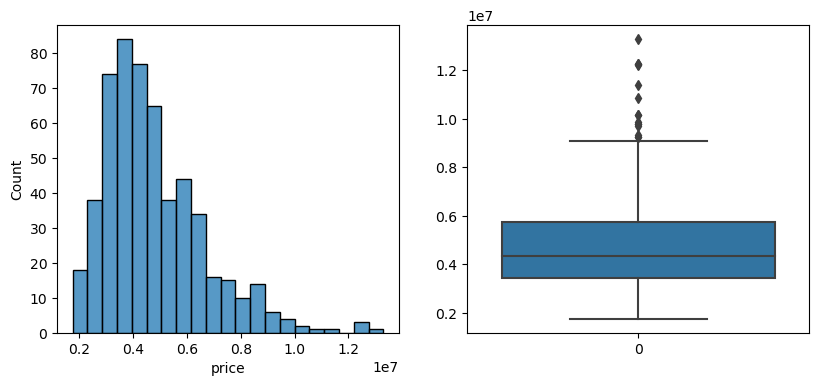

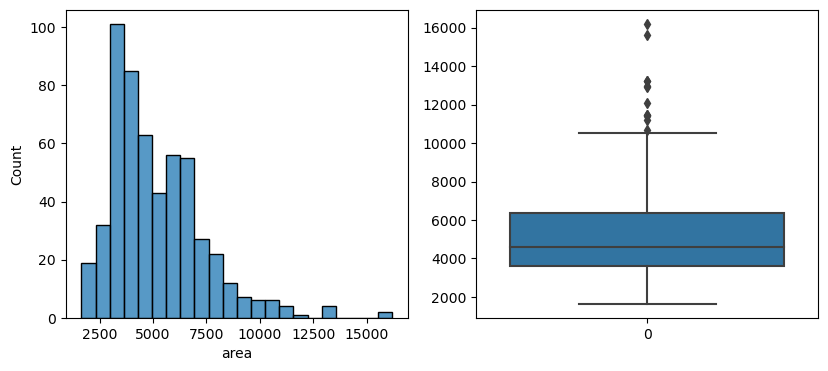

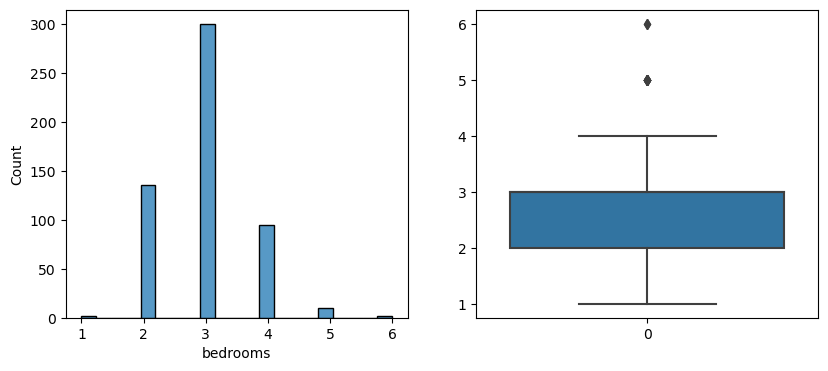

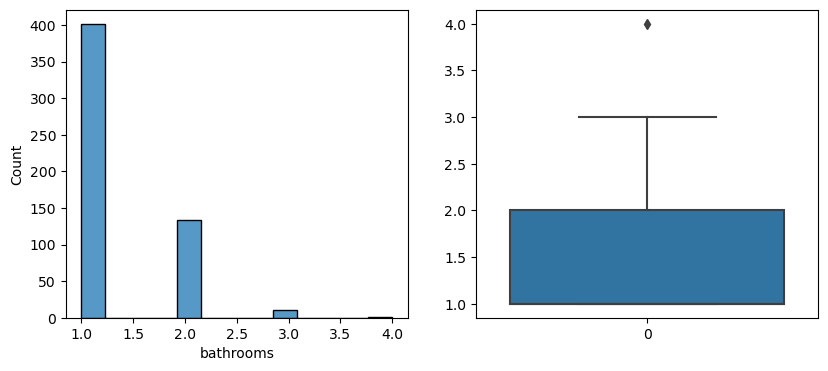

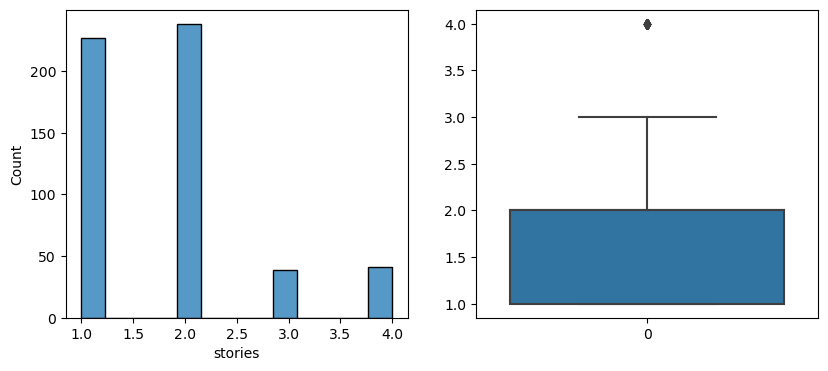

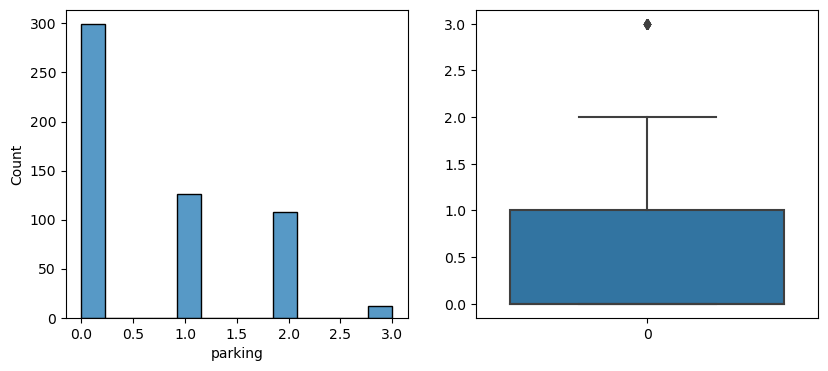

In [118]:
for col in Num_col1:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    
    sns.histplot(Num_col1[col])
    plt.subplot(132)
    
    sns.boxplot(Num_col1[col])


1. Houses have an area between 3700 to 5000 sold more, but according to the 2nd graph there are some outlier present to
2. Buyers buy 3 bedrooms house more
3. 1 bathrooms houses sold more
4. 1 and 2 stories building sold more as compared to 3, 4
5. The number of 0 parking houses is more than 1 and 2 parking and according to the graph buyers who buy 3 parking is less than 25.

# Bivariate Analysis
We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables.

The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

Different methods are used to tackle these combinations during analysis process.

In [119]:
data1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')

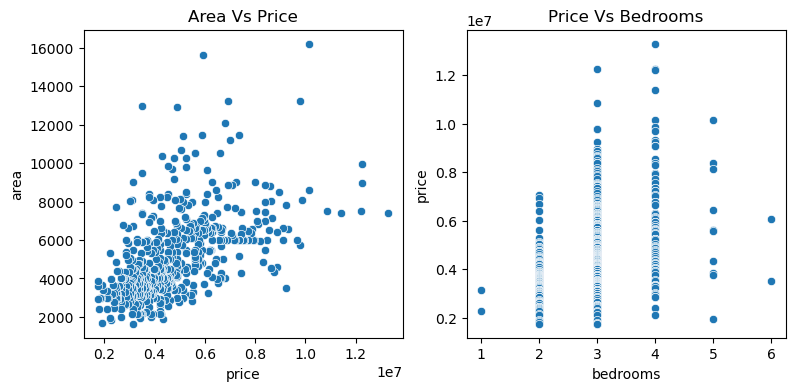

In [120]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.title("Area Vs Price")
sns.scatterplot(x='price',y='area',data=data1)

plt.subplot(1,3,2)
plt.title("Price Vs Bedrooms")
sns.scatterplot(x='bedrooms',y='price',data=data1)
plt.show()

We clearly see that if price increase area increase in Area Vs Price graph but there are some outlier too if we remove outlier 
then our data is more clear

In 2nd graph if we increase price number of bedrooms increase.


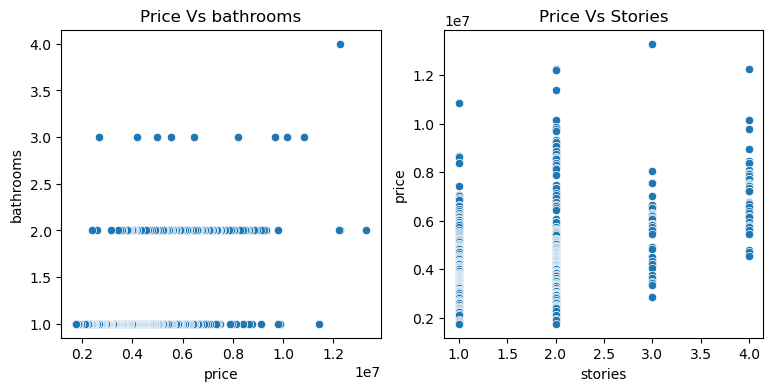

In [121]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.title("Price Vs bathrooms")
sns.scatterplot(x='price',y='bathrooms',data=data1)

plt.subplot(1,3,2)
plt.title("Price Vs Stories")
sns.scatterplot(x='stories',y='price',data=data1)
plt.show()


In both the graph we see that if we increase price number of bathrooms and stories increase

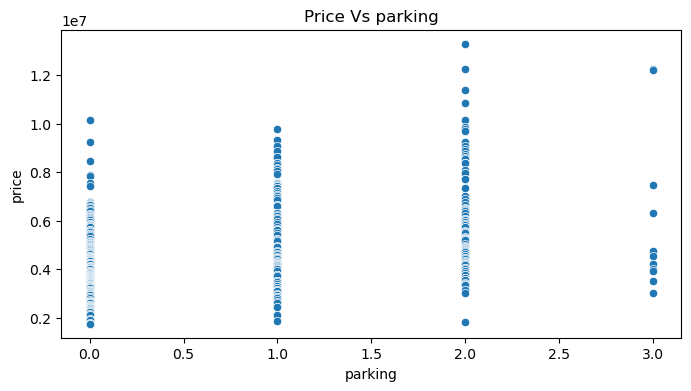

In [122]:
plt.figure(figsize=(8,4))
plt.title("Price Vs parking")
sns.scatterplot(x='parking',y='price',data=data1)
plt.show()

If we increase price, parking increase

<Figure size 1300x1700 with 0 Axes>

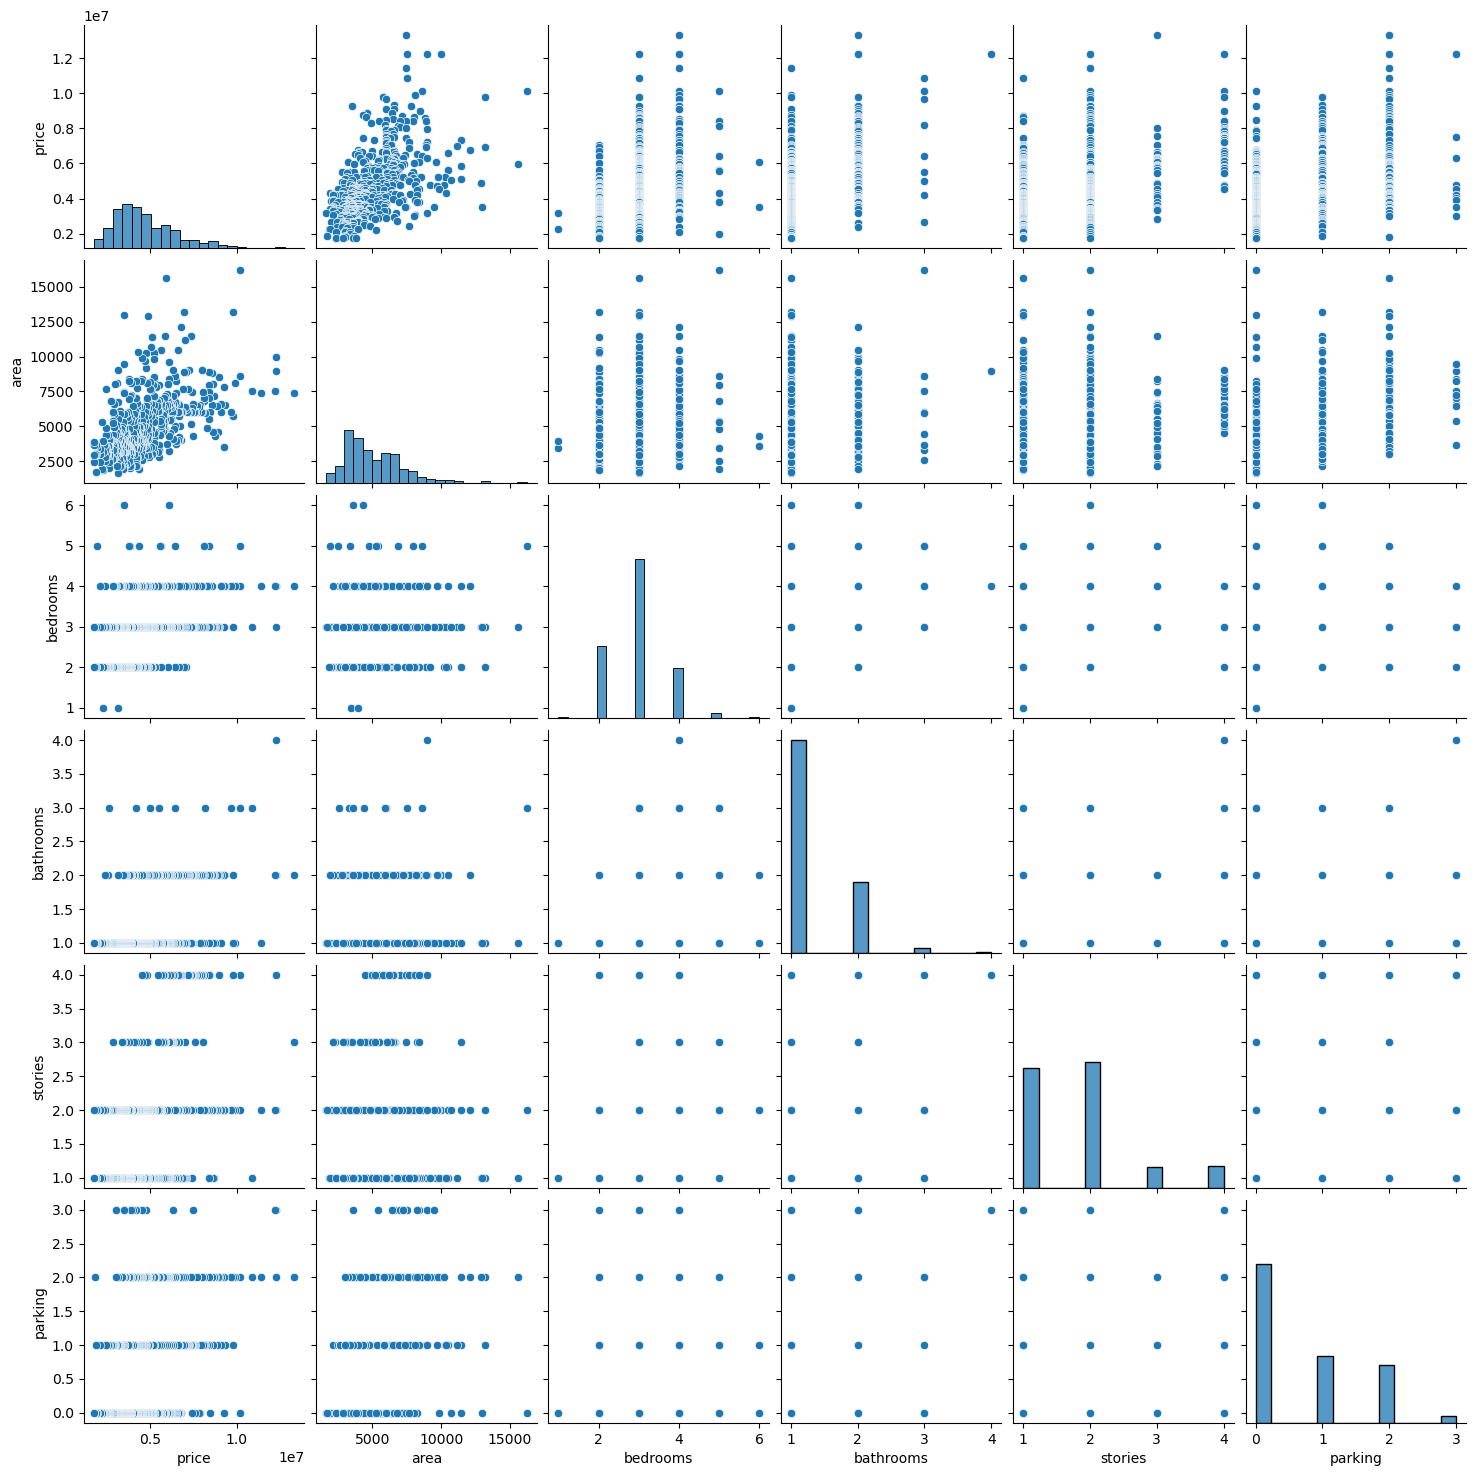

In [123]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data1)
plt.show()


It shows the positive co relation between price and area

# Multivariate Analysis
We perform multivariate analysis with more than 2 variables for any combination of categorical and continuous variables.

The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

Different methods are used to tackle these combinations during analysis process.

C:\Users\DELL\AppData\Local\Temp\ipykernel_12216\1756142009.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data1.corr()


<Axes: >

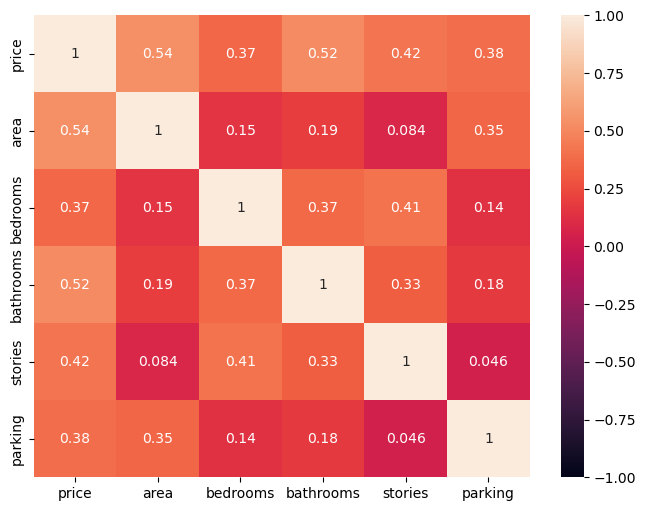

In [124]:
## Co-relation matrix
fig,ax = plt.subplots(figsize = (8,6))
corr = data1.corr()
sns.heatmap(corr,annot=True,vmax=1,vmin=-1)

----From the Heat map, we can infer the following:
    
    1. price has a strong positive corelation to area 0.54 and bathrooms 0.52

    2. According to graph there is no negative corelation

In [125]:
#lets visualize using scatter plot

Text(0.5, 1.0, 'Area Vs Price')

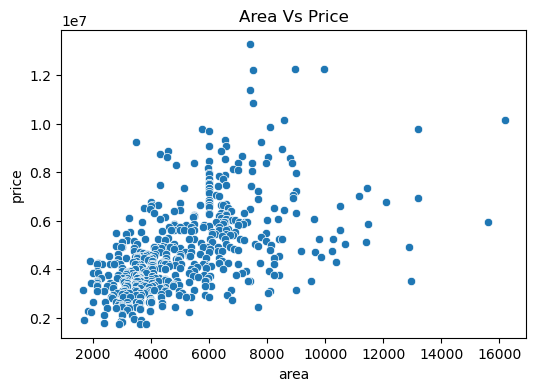

In [126]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='area',y='price',data=data1)
plt.title("Area Vs Price")

We clearly see that if we increase price also is also increased.

Text(0.5, 1.0, 'bathrooms Vs Price')

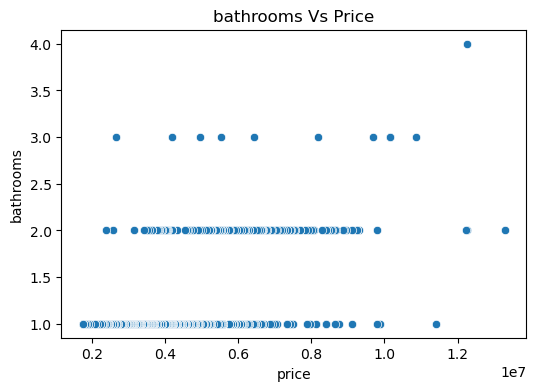

In [127]:
plt.figure(figsize=(6,4))
sns.scatterplot(y='bathrooms',x='price',data=data1)
plt.title("bathrooms Vs Price")

If we increase price, number of bathrooms increased.

# --------Through EDA, we got useful insights,

Most of the buyers prefer 3 bedrooms house with 1 bathrooms, 2 stories.

The number of buyers who wants parking is more as compared to those who want.

Buyers were least interested to buy a house with a guestroom and airconditioning.

41% of buyers want semifurnished house and 32% non furnished.

As per visualization we saw if we increase the price area will increase.


# converting categorical data to numerical

In [128]:
cat_data = data1.select_dtypes(include = 'object')               # to get categorical data
cat_data.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')

In [129]:
#we copy our original data into other variable
data2=data1.copy()
data2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [130]:
#first we change mainroad to numerical
data2["mainroad"].unique()

array(['yes', 'no'], dtype=object)

In [131]:
data2["mainroad"]=data2["mainroad"].map({'yes':0,'no':1})

In [132]:
data2["guestroom"].unique()

array(['no', 'yes'], dtype=object)

In [133]:
data2["guestroom"]=data2["guestroom"].map({'yes':0,'no':1})

In [134]:
data2["basement"].unique()

array(['no', 'yes'], dtype=object)

In [135]:
data2["basement"]=data2["basement"].map({'yes':0,'no':1})

In [136]:
data2["hotwaterheating"].unique()

array(['no', 'yes'], dtype=object)

In [137]:
data2["hotwaterheating"]=data2["hotwaterheating"].map({'yes':0,'no':1})

In [138]:
data2["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [139]:
data2["furnishingstatus"]=data2["furnishingstatus"].map({'furnished':0,'semi-furnished':1,'unfurnished':2})

In [140]:
data2["airconditioning"]=data2["airconditioning"].map({'yes':0,'no':1})

In [141]:
data2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0
1,12250000,8960,4,4,4,0,1,1,1,0,3,0
2,12250000,9960,3,2,2,0,1,0,1,1,2,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0
4,11410000,7420,4,1,2,0,0,0,1,0,2,0


# Apply Linear Regression without removing outlier

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [150]:
#we split the data 
x = data2.drop(['price'],axis=1)  #(independent column)
y = data2['price']               #(dependent column)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [152]:
len(X_train), len(y_train)              #check the length of train data

(436, 436)

In [153]:
len(X_test), len(y_test)                 #check the length of test data

(109, 109)

### Give data to model

In [154]:
lr= LinearRegression()              #create an object of linearRegression

In [155]:
lr.fit(X_train , y_train)   # fit is mediator,it gives train data to reg (algorithm: y=mx+c)

LinearRegression()

In [156]:
y_pred=lr.predict(X_train)                #predict the value for train data and save it in a variable y_pred

In [157]:
lr.coef_                   #find the value of m

array([ 2.52680728e+02,  9.95843362e+04,  1.05808574e+06,  4.02470774e+05,
       -4.92839898e+05, -2.79380908e+05, -4.89623106e+05, -6.32878381e+05,
       -7.90165893e+05,  2.28904460e+05, -2.16730187e+05])

In [158]:
lr.intercept_           #find the value of slope(c)

2887547.4694605274

model looks like
mx+c

### check train data accuracy and loss without removing the outlier

In [159]:
print(f'train data accuracy: {r2_score(y_train,y_pred)}')

train data accuracy: 0.6652807320087134


In [160]:
print(f'train data loss: {1-r2_score(y_train,y_pred)}')

train data loss: 0.3347192679912866


### check test data accuracy and loss without removing the outlier

In [161]:
y_pred_test=lr.predict(X_test)            #predict the value for test data

In [162]:
print(f'test data accuracy: {r2_score(y_test,y_pred_test)}')

test data accuracy: 0.633451368281315


In [163]:
print(f'test data accuracy: {1-r2_score(y_test,y_pred_test)}')

test data accuracy: 0.366548631718685


# Using pearson method

In [164]:
#to prevent the overfitting part do train test spilt before applying the pearson corelation

In [173]:
corr_matrix=X_train.corr()
corr_matrix

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
area,1.000000,0.154674,0.199208,0.070472,-0.291014,-0.175797,-0.040558,0.004422,-0.215263,0.337417,-0.137680
bedrooms,0.154674,1.000000,0.391447,0.405104,-0.003872,-0.081881,-0.092501,-0.026769,-0.203194,0.141470,-0.109973
bathrooms,0.199208,0.391447,1.000000,0.315805,-0.048138,-0.090957,-0.085245,-0.047174,-0.212131,0.194037,-0.133821
stories,0.070472,0.405104,0.315805,1.000000,-0.118688,-0.048842,0.184271,-0.021927,-0.325929,0.050604,-0.143561
mainroad,-0.291014,-0.003872,-0.048138,-0.118688,1.000000,0.104378,0.057313,-0.026148,0.128881,-0.196238,0.168604
guestroom,-0.175797,-0.081881,-0.090957,-0.048842,0.104378,1.000000,0.400636,-0.025583,0.155998,-0.031599,0.116619
basement,-0.040558,-0.092501,-0.085245,0.184271,0.057313,0.400636,1.000000,0.002808,0.093903,-0.044927,0.141937
hotwaterheating,0.004422,-0.026769,-0.047174,-0.021927,-0.026148,-0.025583,0.002808,1.000000,-0.130844,-0.060281,0.032221
airconditioning,-0.215263,-0.203194,-0.212131,-0.325929,0.128881,0.155998,0.093903,-0.130844,1.000000,-0.192711,0.165236
parking,0.337417,0.141470,0.194037,0.050604,-0.196238,-0.031599,-0.044927,-0.060281,-0.192711,1.000000,-0.181584


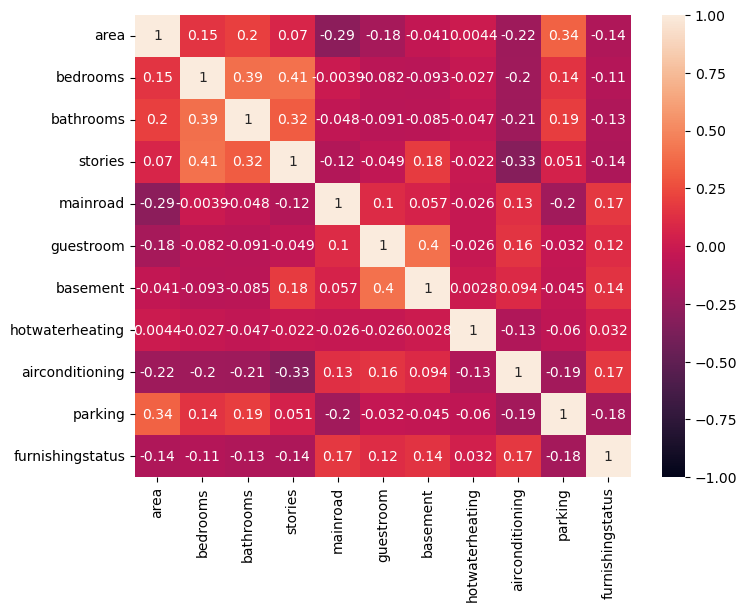

In [175]:
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = X_train.corr()
sns.heatmap(cor, annot=True,vmin=-1,vmax=1)
plt.show()

In [176]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [180]:
corr_features = correlation(data1, 0.7)
len(set(corr_features))

C:\Users\DELL\AppData\Local\Temp\ipykernel_12216\3726835926.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


0

In [181]:
#there are no data who are 70% co-related 0r 60% so we do not remove any of the column.

# Lasso Regression

In [182]:
from sklearn.linear_model import Lasso
lr2 = Lasso(alpha=0.5)        #create an object of lasso 
lr2.fit(X_train,y_train)       #fit the data


y_train_predction1 = lr2.predict(X_train)       #do the predictions for train data
y_test_predction1 = lr2.predict(X_test)          #do the predictions for test data


print("R2_score value = ",r2_score(y_train,y_train_predction1))
print("R2_score value = ",r2_score(y_test,y_test_predction1))


checking = pd.DataFrame()                  #creating a data frame
checking["column_names"] = X_train.columns
checking["coeffcient_values"] = lr.coef_
checking["Lasso_coefficient_values"] = lr2.coef_

checking

R2_score value =  0.6652807320050076
R2_score value =  0.6334510285545947


,column_names,coeffcient_values,Lasso_coefficient_values
0,area,2.526807e+02,2.526812e+02
1,bedrooms,9.958434e+04,9.958402e+04
2,bathrooms,1.058086e+06,1.058084e+06
3,stories,4.024708e+05,4.024711e+05
4,mainroad,-4.928399e+05,-4.928356e+05
5,guestroom,-2.793809e+05,-2.793783e+05
6,basement,-4.896231e+05,-4.896224e+05
7,hotwaterheating,-6.328784e+05,-6.328672e+05
8,airconditioning,-7.901659e+05,-7.901635e+05
9,parking,2.289045e+05,2.289044e+05


# Feature Scaling

In [183]:
import seaborn as sns 
import scipy.stats as stats 

In [184]:
# one common function:
def plotting(df,var):
    plt.figure(figsize=(15,3))
    plt.subplot(1,3,1)
    # hist
    df[var].hist(bins=20)
    # distplot
    plt.subplot(1,3,2)
    df[var].plot(kind='kde',color='r')
    # probplot
    plt.subplot(1,3,3)
    stats.probplot(df[var],plot=plt)
    
    plt.show()
    

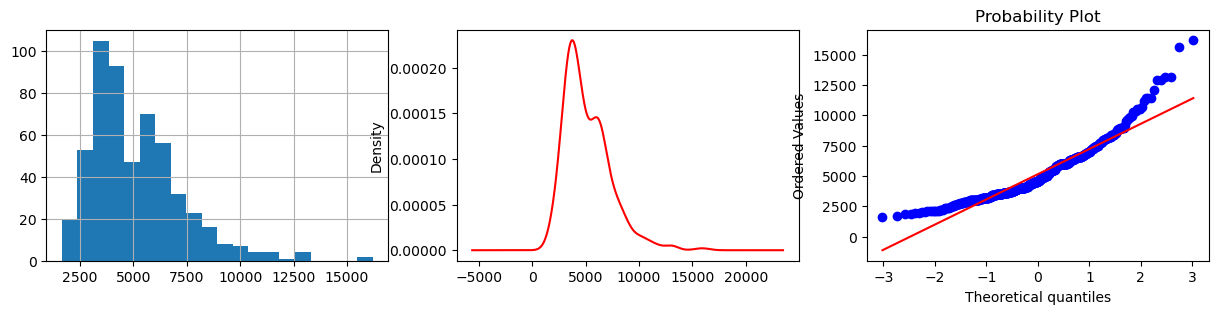

In [190]:
plotting(data2,'area')

In [213]:
# log transformation

data2['area_log'] = np.log(data2['area'])

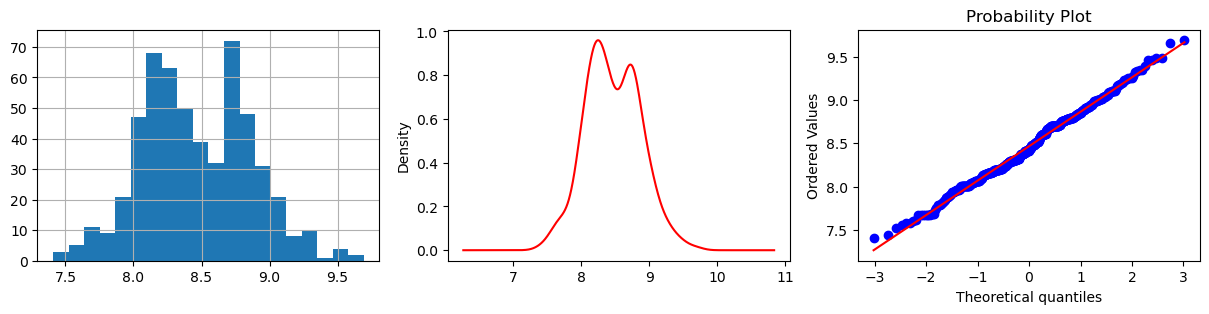

In [199]:
plotting(data2,'area_log')

<Axes: xlabel='area_log'>

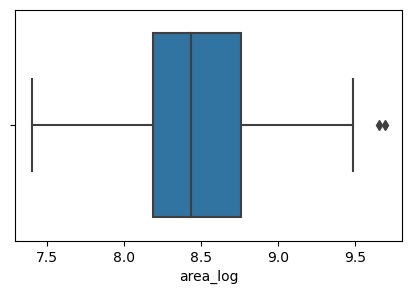

In [200]:
plt.figure(figsize=(5,3))
sns.boxplot(x='area_log',data=data2)

# Detect Outlier in Area

In [201]:
#we clearly see outlier here, now we find 25 and 75 percentile value then IQR 

In [203]:
data2['area_log'].describe()

count    545.000000
mean       8.466537
std        0.398283
min        7.408531
25%        8.188689
50%        8.433812
75%        8.757784
max        9.692767
Name: area_log, dtype: float64

In [206]:
q1 = data2['area_log'].quantile(0.25)
q3 = data2['area_log'].quantile(0.75)   

IQR=q3-q1
IQR

0.5690945318899665

In [207]:
upper_whisker = q3 + (1.5*IQR)
lower_whisker = q1 - (1.5*IQR)

In [208]:
print("Upper limit",upper_whisker)
print("lower limit",lower_whisker)

Upper limit 9.611425454169117
lower limit 7.335047326609251


In [209]:
data2[data2['area_log']>upper_whisker ]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,area_log,bedrooms_log
7,10150000,16200,5,3,2,0,1,1,1,1,0,2,9.692767,1.609438
125,5943000,15600,3,1,1,0,1,1,1,0,2,1,9.655026,1.098612


In [210]:
#these are the column whose area more than upper limit so we need to replace it by the value of upper limit with the help of cap method

### Use capping to replace value

In [211]:
#here we write caping code in this first condition check if it is true then outlier value replace by upper limit,then 
# it check 2nd condition if is true then it replace the outlier with lower limit if both condition false then data is same
data2['area_log'] = np.where(data2['area_log']>upper_whisker, upper_whisker,
                 np.where(data2['area_log']<lower_whisker, lower_whisker, data2['area_log']))

Text(0.5, 1.0, 'After')

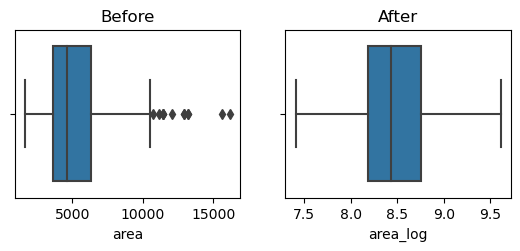

In [212]:
#now we check outlier

plt.subplot(2,2,1)
sns.boxplot(x='area',data=data1)
plt.title("Before")

plt.subplot(2,2,2)
sns.boxplot(x='area_log',data=data2)
plt.title("After")

### Now we perform linear regression and check is there any difference in accuracy now¶

In [214]:
#we split the data 
x1 = data2.drop(['price'],axis=1)  #(independent column)
y1 = data2['price']               #(dependent column)

In [215]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [216]:
lr= LinearRegression()
lr.fit(X_train1 , y_train1)


LinearRegression()

In [217]:
y_pred_train=lr.predict(X_train1)                #predict the value for train data

In [218]:
# m values                                    # slope
lr.coef_

array([ 5.25699772e+01, -8.33026180e+04,  1.05727181e+06,  3.93443032e+05,
       -4.11547955e+05, -2.16586929e+05, -5.02981827e+05, -6.37782185e+05,
       -7.42822718e+05,  2.14867544e+05, -2.29687826e+05,  1.19710317e+06,
        5.56408214e+05])

In [219]:
lr.intercept_

-6303032.850638008

### check train data accuracy and loss with removing the outlier

In [220]:
print(f'train data accuracy: {r2_score(y_train1,y_pred_train)}')


train data accuracy: 0.6700309835676518


In [221]:
print(f'train data loss: {1-r2_score(y_train1,y_pred_train)}')

train data loss: 0.3299690164323482


### check test data accuracy and loss with removing the outlier

In [222]:
print(f'test data accuracy: {r2_score(y_test1,y_pred_test)}')


test data accuracy: 0.633451368281315


In [223]:
print(f'test data accuracy: {1-r2_score(y_test1,y_pred_test)}')


test data accuracy: 0.366548631718685


After removing outlier from area our test data occuracy is same.

# Applying Lasso

In [225]:
from sklearn.linear_model import Lasso
lr2 = Lasso(alpha=0.5)
lr2.fit(X_train1,y_train1)


y_train_predction2 = lr2.predict(X_train1)
y_test_predction2= lr2.predict(X_test1)


print("R2_score value = ",r2_score(y_train1,y_train_predction1))
print("R2_score value = ",r2_score(y_test1,y_test_predction1))


checking = pd.DataFrame()
checking["column_names"] = X_train1.columns
checking["coeffcient_values"] = lr.coef_
checking["Lasso_coefficient_values"] = lr2.coef_

checking

R2_score value =  0.6652807320050076
R2_score value =  0.6334510285545947


,column_names,coeffcient_values,Lasso_coefficient_values
0,area,5.256998e+01,5.257837e+01
1,bedrooms,-8.330262e+04,-8.319922e+04
2,bathrooms,1.057272e+06,1.057266e+06
3,stories,3.934430e+05,3.934468e+05
4,mainroad,-4.115480e+05,-4.115490e+05
5,guestroom,-2.165869e+05,-2.165861e+05
6,basement,-5.029818e+05,-5.029844e+05
7,hotwaterheating,-6.377822e+05,-6.377703e+05
8,airconditioning,-7.428227e+05,-7.428234e+05
9,parking,2.148675e+05,2.148692e+05


In [227]:
data = [['LR train data accuracy without removing outlier', 0.6652807320087134], 
        ['LR Test data accuracy without removing outlier',0.6334510285545947 ], 
        ['LassoR test data without removing outlier ', 0.6334510285545947]
        ,['LR Train data accuracy with removing the outlier of area',0.6700309835676518],
       ['LR Test data accuracy with removing the outlier of area', 0.633451368281315],
        ['LassoR Test data accuracy with removing the outlier of area',0.6334510285545947]]
       
final = pd.DataFrame(data, columns=['Algorithm', 'Value'])    

In [228]:
final

,Algorithm,Value
0,LR train data accuracy without removing outlier,0.665281
1,LR Test data accuracy without removing outlier,0.633451
2,LassoR test data without removing outlier,0.633451
3,LR Train data accuracy with removing the outli...,0.670031
4,LR Test data accuracy with removing the outlie...,0.633451
5,LassoR Test data accuracy with removing the ou...,0.633451
